## 1: Data Preparation 

In [1]:
# Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# Always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#Code goes after this line by adding cells

### 1.1 Data Retrieving

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
starwars = pd.read_csv('StarWars.csv',encoding = 'latin1')

In [4]:
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


As we can see, the columns headers are multi-indexed and needs to dealt with at first before Data Exploration

In [5]:
starwars.nunique()

RespondentID                                                                                                                                     1186
Have you seen any of the 6 films in the Star Wars franchise?                                                                                        4
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                               5
Which of the following Star Wars films have you seen? Please select all that apply.                                                                 1
Unnamed: 4                                                                                                                                          1
Unnamed: 5                                                                                                                                          1
Unnamed: 6                                                                                          

In [6]:
starwars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.' : 'Watched|Movie1',
                        'Unnamed: 4' : 'Watched|Movie2',
                        'Unnamed: 5' : 'Watched|Movie3',
                        'Unnamed: 6' : 'Watched|Movie4',
                        'Unnamed: 7' : 'Watched|Movie5',
                        'Unnamed: 8' : 'Watched|Movie6',
                        'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'Rank|Movie1',
                        'Unnamed: 10' : 'Rank|Movie2',
                        'Unnamed: 11' : 'Rank|Movie3',
                        'Unnamed: 12' : 'Rank|Movie4',
                        'Unnamed: 13' : 'Rank|Movie5',
                        'Unnamed: 14' : 'Rank|Movie6',
                        'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.' : 'Familiarity|Han Solo',
                        'Unnamed: 16' : 'Familiarity|Luke Skywalker',
                        'Unnamed: 17' : 'Familiarity|Princess Leia Organa',
                        'Unnamed: 18' : 'Familiarity|Anakin Skywalker',
                        'Unnamed: 19' : 'Familiarity|Obi Wan Kenobi',
                        'Unnamed: 20' : 'Familiarity|Emperor Palpatine',
                        'Unnamed: 21' : 'Familiarity|Darth Vader',
                        'Unnamed: 22' : 'Familiarity|Lando Calrissian',
                        'Unnamed: 23' : 'Familiarity|Boba Fett',
                        'Unnamed: 24' : 'Familiarity|C-3P0',
                        'Unnamed: 25' : 'Familiarity|R2 D2',
                        'Unnamed: 26' : 'Familiarity|Jar Jar Binks',
                        'Unnamed: 27' : 'Familiarity|Padme Amidala',
                        'Unnamed: 28' : 'Familiarity|Yoda'},inplace = True)

After renaming the columns, we can see all of the unnamed columns are named now. Below we are checking if the columns which have been renamed have unique values. 


Also dropping the first row as it is redundant now because we renamed the columns with meaningful headings

In [7]:
starwars.nunique()

RespondentID                                                             1186
Have you seen any of the 6 films in the Star Wars franchise?                4
Do you consider yourself to be a fan of the Star Wars film franchise?       5
Watched|Movie1                                                              1
Watched|Movie2                                                              1
Watched|Movie3                                                              1
Watched|Movie4                                                              1
Watched|Movie5                                                              1
Watched|Movie6                                                              1
Rank|Movie1                                                                 7
Rank|Movie2                                                                 7
Rank|Movie3                                                                 7
Rank|Movie4                                                     

In [8]:
starwars.drop([0],inplace = True)

In [9]:
starwars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes     935
No      250
Yes       1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

### 1.2 Check DataTypes 

In [10]:
starwars.dtypes

RespondentID                                                             float64
Have you seen any of the 6 films in the Star Wars franchise?              object
Do you consider yourself to be a fan of the Star Wars film franchise?     object
Watched|Movie1                                                            object
Watched|Movie2                                                            object
Watched|Movie3                                                            object
Watched|Movie4                                                            object
Watched|Movie5                                                            object
Watched|Movie6                                                            object
Rank|Movie1                                                               object
Rank|Movie2                                                               object
Rank|Movie3                                                               object
Rank|Movie4                 

### 1.3 Upper/Lower-case

In [11]:
starwars[(starwars.select_dtypes(['object'])).columns] = starwars.select_dtypes(['object']).apply(lambda x: x.str.upper())

### 1.4 Extra-whitespaces

In [12]:
starwars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

YES     935
NO      250
YES       1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
starwars[(starwars.select_dtypes(['object'])).columns] = starwars.select_dtypes(['object']).apply(lambda x: x.str.strip())

In [14]:
starwars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

YES    936
NO     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

### 1.5 Typos

In [15]:
for col in starwars.columns[1:]:
    print(starwars[col].value_counts())

YES    936
NO     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
YES     551
NO      283
NOO       1
YESS      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
STAR WARS: EPISODE I  THE PHANTOM MENACE    673
Name: Watched|Movie1, dtype: int64
STAR WARS: EPISODE II  ATTACK OF THE CLONES    571
Name: Watched|Movie2, dtype: int64
STAR WARS: EPISODE III  REVENGE OF THE SITH    550
Name: Watched|Movie3, dtype: int64
STAR WARS: EPISODE IV  A NEW HOPE    607
Name: Watched|Movie4, dtype: int64
STAR WARS: EPISODE V THE EMPIRE STRIKES BACK    758
Name: Watched|Movie5, dtype: int64
STAR WARS: EPISODE VI RETURN OF THE JEDI    738
Name: Watched|Movie6, dtype: int64
4    237
6    168
3    130
1    129
5    100
2     71
Name: Rank|Movie1, dtype: int64
5    300
4    183
2    116
3    103
6    102
1     32
Name: Rank|Movie2, dtype: int64
6    217
5    203
4    182
3    150
2     47
1     36
Name: Rank|Movie3, dtype: int64


Value counts for each of the columns are obtained which makes it easy to detect all the typos in one go or a single ouput. 

In [16]:
starwars['Are you familiar with the Expanded Universe?'].value_counts()

NO     615
YES    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

In [17]:
starwars['Do you consider yourself to be a fan of the Expanded Universe?\x8cæ'].value_counts()

NO      114
YES      98
YESS      1
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: int64

In [18]:
typos = {'YESS': 'YES',    
         'NOO':'NO',  
         'F':'FEMALE'}
starwars[(starwars.select_dtypes(['object'])).columns] = starwars.select_dtypes(['object']).apply(lambda x: x.replace(typos))

As we can see all the typos of Male, Female, Yes & No has been rectified. 



However there is still an error in the variable "Do you consider yourself to be a fan of the Expanded Universe?æ"

In [19]:
starwars.rename({'Do you consider yourself to be a fan of the Expanded Universe?\x8cæ' : 'Do you consider yourself to be a fan of the Expanded Universe?'},inplace = True)

Column name had an extra string which needed to be replaced. 

In [20]:
starwars.dtypes

RespondentID                                                             float64
Have you seen any of the 6 films in the Star Wars franchise?              object
Do you consider yourself to be a fan of the Star Wars film franchise?     object
Watched|Movie1                                                            object
Watched|Movie2                                                            object
Watched|Movie3                                                            object
Watched|Movie4                                                            object
Watched|Movie5                                                            object
Watched|Movie6                                                            object
Rank|Movie1                                                               object
Rank|Movie2                                                               object
Rank|Movie3                                                               object
Rank|Movie4                 

As we can see from below, there are no typos which exist. 

In [21]:
for col in starwars.columns[1:]:
    print(starwars[col].value_counts())
    print()    

YES    936
NO     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

YES    552
NO     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

STAR WARS: EPISODE I  THE PHANTOM MENACE    673
Name: Watched|Movie1, dtype: int64

STAR WARS: EPISODE II  ATTACK OF THE CLONES    571
Name: Watched|Movie2, dtype: int64

STAR WARS: EPISODE III  REVENGE OF THE SITH    550
Name: Watched|Movie3, dtype: int64

STAR WARS: EPISODE IV  A NEW HOPE    607
Name: Watched|Movie4, dtype: int64

STAR WARS: EPISODE V THE EMPIRE STRIKES BACK    758
Name: Watched|Movie5, dtype: int64

STAR WARS: EPISODE VI RETURN OF THE JEDI    738
Name: Watched|Movie6, dtype: int64

4    237
6    168
3    130
1    129
5    100
2     71
Name: Rank|Movie1, dtype: int64

5    300
4    183
2    116
3    103
6    102
1     32
Name: Rank|Movie2, dtype: int64

6    217
5    203
4    182
3    150
2     47
1     36
Name: Rank|Movie3, dtype: int64

1    204
6    1

### 1.6 Sanity Checks

As we can see, the Age of a person is showing as 500 which needs to be imputed with null value. 

In [22]:
starwars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    217
500        1
Name: Age, dtype: int64

In [23]:
starwars['Age'].replace('500','45-60',inplace = True)

Including it between 45-60 because it being a typo for an age of '50'

In [24]:
starwars['Age'].value_counts()

45-60    292
> 60     269
30-44    268
18-29    217
Name: Age, dtype: int64

### 1.7 Missing Values

Now assigning ```True``` - for Movies watched and ```False``` - for missing values (movie not watched) from column ```Watched|Movie1``` to column ```Watched|Movie6```

In [25]:
for col in 'Watched|Movie1','Watched|Movie2','Watched|Movie3','Watched|Movie4','Watched|Movie5','Watched|Movie6':
    starwars[col] = ~starwars[col].isna()
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Watched|Movie1,Watched|Movie2,Watched|Movie3,Watched|Movie4,Watched|Movie5,Watched|Movie6,Rank|Movie1,...,Familiarity|Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,YES,YES,True,True,True,True,True,True,3,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
2,3.292880e+09,NO,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL
3,3.292765e+09,YES,NO,True,True,True,False,False,False,1,...,UNFAMILIAR (N/A),I DON'T UNDERSTAND THIS QUESTION,NO,NaN,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL
4,3.292763e+09,YES,YES,True,True,True,True,True,True,5,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
5,3.292731e+09,YES,YES,True,True,True,True,True,True,5,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL


In [26]:
starwars.isnull().sum()

RespondentID                                                               0
Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?    350
Watched|Movie1                                                             0
Watched|Movie2                                                             0
Watched|Movie3                                                             0
Watched|Movie4                                                             0
Watched|Movie5                                                             0
Watched|Movie6                                                             0
Rank|Movie1                                                              351
Rank|Movie2                                                              350
Rank|Movie3                                                              351
Rank|Movie4                                                              350

Some of the people have watched one movie but the ranks for all the movies were given. This should not be an indicator and will create noise for the data exploration. 

In [27]:
lst = []
for index, row in starwars.iterrows():
    if(row[1] == 'YES'):
        if(row[3]* row[4] * row[5] * row[6] * row[7] * row[8]== False):
            lst.append(index)
            
print(len(lst))

465


In [28]:
starwars = starwars.drop(lst)
starwars = starwars[starwars['Do you consider yourself to be a fan of the Star Wars film franchise?'].notna()]

In the above for loop, it is checking 
<br>1)If the 'Have you seen any of the 6 films in the Star Wars franchise?' == YES</br>
<br>2)If there is any missing value in the Watched|Movies column</br>
<br>If the above two conditions satisfy the condition, then that row is removed. </br> 
This is because the rankings for movies are given even though some people have not watched a movie. 
<br> For example, one person has not watched Movie3 but still has given a rating for it. This will just create noise and needs to be removed</br> 

In [29]:
starwars.shape

(471, 38)

In [30]:
starwars.isnull().sum()

RespondentID                                                               0
Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?      0
Watched|Movie1                                                             0
Watched|Movie2                                                             0
Watched|Movie3                                                             0
Watched|Movie4                                                             0
Watched|Movie5                                                             0
Watched|Movie6                                                             0
Rank|Movie1                                                                0
Rank|Movie2                                                                0
Rank|Movie3                                                                1
Rank|Movie4                                                                0

As we can see that, some of the null values have been removed. The other missing values cannot be removed because that will cause a lot of data to be lost. To make the visualizations more realistic, there has to be enough data to get accurate results. 

##### Dealing with NaN values for task 3
<br>Now looking at columns of poeple's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Star War characters.</br>
The data has to be inluded in task 3 should be not have any missing values. 

In [31]:
ques3 = starwars[starwars.columns[15:]]
ques3.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,...,Familiarity|Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,UNFAMILIAR (N/A),UNFAMILIAR (N/A),VERY FAVORABLY,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
4,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,...,VERY FAVORABLY,HAN,YES,NO,YES,MALE,18-29,"$25,000 - $49,999",BACHELOR DEGREE,MIDDLE ATLANTIC
7,VERY FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,...,VERY FAVORABLY,HAN,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,EAST NORTH CENTRAL


As we can see above, a new dataframe has been subsetted from the original dataframe to get rid of null values only from these columns. This newly created dataframe is going to be used in question 3 ('Relationship between people’s demographics  and their attitude to Start War characters') below. 

In [32]:
ques3.dropna(inplace = True)

In [33]:
ques3.isna().sum()

Familiarity|Han Solo                                                0
Familiarity|Luke Skywalker                                          0
Familiarity|Princess Leia Organa                                    0
Familiarity|Anakin Skywalker                                        0
Familiarity|Obi Wan Kenobi                                          0
Familiarity|Emperor Palpatine                                       0
Familiarity|Darth Vader                                             0
Familiarity|Lando Calrissian                                        0
Familiarity|Boba Fett                                               0
Familiarity|C-3P0                                                   0
Familiarity|R2 D2                                                   0
Familiarity|Jar Jar Binks                                           0
Familiarity|Padme Amidala                                           0
Familiarity|Yoda                                                    0
Which character shot

### 2.1 Explore a survey question

In [34]:
# Task 2: Data Exploration
# 1. Explore the survey question: \textit{Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I  The Phantom Menace; Star Wars: Episode II  Attack of the Clones; Star Wars: Episode III  Revenge of the Sith;	Star Wars: Episode IV  A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)}, then analysis how people rate Star Wars Movies. 


#Code goes after this line by adding cells

In [35]:
starwars.iloc[:,9:15] = starwars.iloc[:,9:15].astype(float)

Converting the columns to float values because we cannot take mean of string values

In [36]:
cols = ['Rank|Movie1','Rank|Movie2','Rank|Movie3','Rank|Movie4','Rank|Movie5','Rank|Movie6']
avg = {}
data = {}
for col in cols:
    avg[col] = (starwars[col].mean())**-1 #(below for explaination)
data['mean'] = avg
data   


{'mean': {'Rank|Movie1': 0.23597194388777556,
  'Rank|Movie2': 0.23110893032384688,
  'Rank|Movie3': 0.23511755877938967,
  'Rank|Movie4': 0.3488888888888889,
  'Rank|Movie5': 0.4201605709188225,
  'Rank|Movie6': 0.3410572049239681}}

The Ranks have been ordered from 1 to 6, where 1 is highest rank while 6 is the lowest rank. Now since 6 being the largest number has been assigned to the movie ranked the least  while 1 being the smallest number has been assigned to the movie which is ranked the best. Because of this issue, the graph will be flipped. To avoid this, the inverse has been taken so that the best ranked movie will have the tallest bar and like wise. 

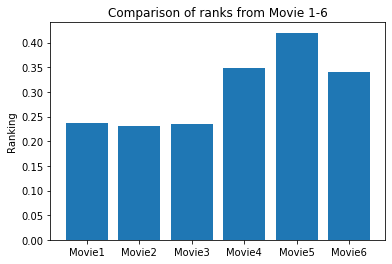

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

In [37]:
rank = sorted(data['mean'].items())

plt.bar(range(len(data['mean'])), [x[1] for x in rank], align = 'center')
plt.xticks(range(len(data['mean'])), ['Movie1','Movie2','Movie3','Movie4','Movie5','Movie6'])
plt.ylabel('Ranking')
plt.title('Comparison of ranks from Movie 1-6')
plt.show()
plt.xticks

### 2.2 Relationship between columns

In [38]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line by adding cells

#### 2.2.1 Comparing Fans of Starwar and their Age

In [39]:
copy1 = starwars[['Do you consider yourself to be a fan of the Star Wars film franchise?','Age']]

In [40]:
copy1.rename(columns = {'Do you consider yourself to be a fan of the Star Wars film franchise?' : 'outcome'},inplace = True)

In [41]:
copy1.head()

,outcome,Age
1,YES,18-29
4,YES,18-29
5,YES,18-29
6,YES,18-29
7,YES,18-29


In [42]:
pd.DataFrame(copy1.Age.value_counts())

,Age
30-44,141
18-29,128
45-60,122
> 60,72


In [43]:
pd.DataFrame(copy1.outcome.value_counts())

,outcome
YES,411
NO,60


In [44]:
stWars = copy1.groupby("Age").outcome.value_counts(normalize = True)
stWars

Age    outcome
18-29  YES        0.890625
       NO         0.109375
30-44  YES        0.858156
       NO         0.141844
45-60  YES        0.877049
       NO         0.122951
> 60   YES        0.847222
       NO         0.152778
Name: outcome, dtype: float64

In [45]:
stWars.index

MultiIndex([('18-29', 'YES'),
            ('18-29',  'NO'),
            ('30-44', 'YES'),
            ('30-44',  'NO'),
            ('45-60', 'YES'),
            ('45-60',  'NO'),
            ( '> 60', 'YES'),
            ( '> 60',  'NO')],
           names=['Age', 'outcome'])

In [46]:
stWars.unstack()

outcome,NO,YES
Age,,
18-29,0.109375,0.890625
30-44,0.141844,0.858156
45-60,0.122951,0.877049
> 60,0.152778,0.847222


```Unstack``` is used so that the output comes out as a dataframe. This makes plotting easier. 

Text(0.5, 1.0, 'Age')

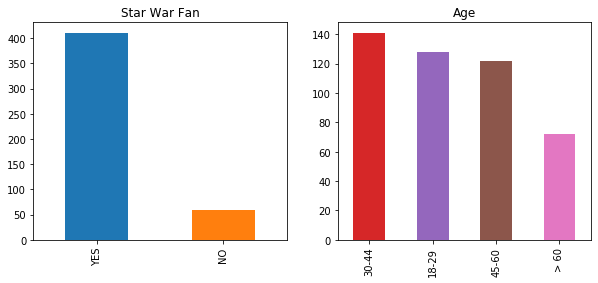

In [47]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);copy1.outcome.value_counts().plot(kind='bar', color=['C0','C1']); plt.title('Star War Fan')
plt.subplot(1,2,2);copy1.Age.value_counts().plot(kind='bar', color=['C3','C4','C5','C6']); plt.title('Age')

Comparing the columns of star war fans and their age next to each other. To get a

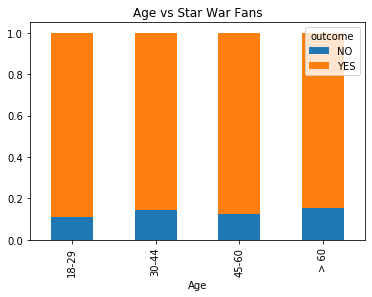

In [48]:
stWars.unstack().plot(kind = 'bar', stacked = True, title = 'Age vs Star War Fans')

The above graph shows the fans of Starwars and their age group. The final conclusion can be that the age group of 18-29 are the people who are more likely to be fans of Star Wars. Up second would be of the age group 45 - 60. 

#### 2.2.2 Comparing Star Trek and the fans age

In [49]:
copy2 = starwars[['Do you consider yourself to be a fan of the Star Trek franchise?','Age']]

In [50]:
copy2.rename(columns = {'Do you consider yourself to be a fan of the Star Trek franchise?' : 'result'},inplace = True)

In [51]:
copy2.head()

,result,Age
1,NO,18-29
4,YES,18-29
5,NO,18-29
6,YES,18-29
7,NO,18-29


In [52]:
pd.DataFrame(copy2.Age.value_counts())

,Age
30-44,141
18-29,128
45-60,122
> 60,72


In [53]:
pd.DataFrame(copy2.result.value_counts())

,result
YES,282
NO,182


In [54]:
stTrek = copy2.groupby("Age").result.value_counts(normalize = True)
stTrek

Age    result
18-29  NO        0.562500
       YES       0.437500
30-44  YES       0.574468
       NO        0.425532
45-60  YES       0.754098
       NO        0.245902
> 60   YES       0.722222
       NO        0.277778
Name: result, dtype: float64

In [55]:
stTrek.index

MultiIndex([('18-29',  'NO'),
            ('18-29', 'YES'),
            ('30-44', 'YES'),
            ('30-44',  'NO'),
            ('45-60', 'YES'),
            ('45-60',  'NO'),
            ( '> 60', 'YES'),
            ( '> 60',  'NO')],
           names=['Age', 'result'])

In [56]:
stTrek.unstack()

result,NO,YES
Age,,
18-29,0.562500,0.437500
30-44,0.425532,0.574468
45-60,0.245902,0.754098
> 60,0.277778,0.722222


Text(0.5, 1.0, 'Age')

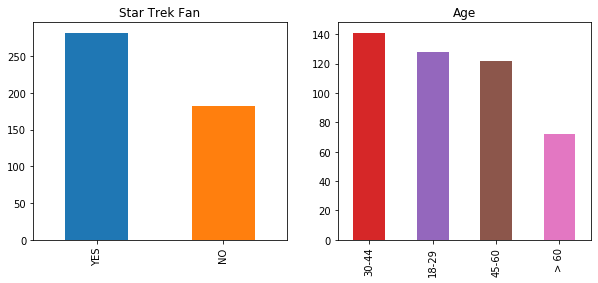

In [57]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);copy2.result.value_counts().plot(kind='bar', color=['C0','C1']); plt.title('Star Trek Fan')
plt.subplot(1,2,2);copy2.Age.value_counts().plot(kind='bar', color=['C3','C4','C5','C6']); plt.title('Age')

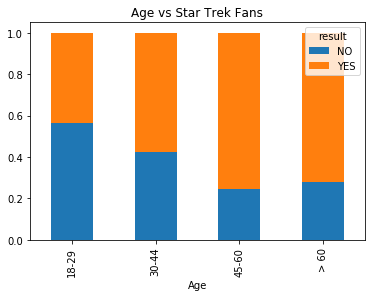

In [58]:
stTrek.unstack().plot(kind = 'bar', stacked = True, title = 'Age vs Star Trek Fans')

As we can see from above that the age group which has more Fans for Star Trek is 45-60. The second highest age group of fans would be 30-44. We can conclude that Star Trek being an older film has fans of a higher age group than of starwars which was done in 2.2.1

#### 2.2.3 Fans who got the right answer to 'Which charecter shot first?'

In [59]:
copy3 = starwars[['Do you consider yourself to be a fan of the Star Wars film franchise?','Which character shot first?']]

copy3.rename(columns = {'Do you consider yourself to be a fan of the Star Wars film franchise?' : 'fan','Which character shot first?' : 'firstShot'},inplace = True)

Taking only 2 columns from the whole data set. This gives us room to analyse this data only. Also, renaming these columns into simpler names. 

In [60]:
copy3.head()

,fan,firstShot
1,YES,I DON'T UNDERSTAND THIS QUESTION
4,YES,I DON'T UNDERSTAND THIS QUESTION
5,YES,GREEDO
6,YES,HAN
7,YES,HAN


In [61]:
pd.DataFrame(copy3.firstShot.value_counts())

,firstShot
HAN,235
GREEDO,128
I DON'T UNDERSTAND THIS QUESTION,101


In [62]:
pd.DataFrame(copy3.fan.value_counts())

,fan
YES,411
NO,60


In [63]:
shot = copy3.groupby("firstShot").fan.value_counts(normalize = True)
shot

firstShot                         fan
GREEDO                            YES    0.882812
                                  NO     0.117188
HAN                               YES    0.927660
                                  NO     0.072340
I DON'T UNDERSTAND THIS QUESTION  YES    0.722772
                                  NO     0.277228
Name: fan, dtype: float64

In [64]:
type(shot)

pandas.core.series.Series

Normalizing the data, and also grouping by based on the first shot('Who shot first?') to get a better understanding of the two columns.

In [65]:
shot.unstack()

fan,NO,YES
firstShot,,
GREEDO,0.117188,0.882812
HAN,0.072340,0.927660
I DON'T UNDERSTAND THIS QUESTION,0.277228,0.722772


Text(0.5, 1.0, 'Which Charecter Shot First?')

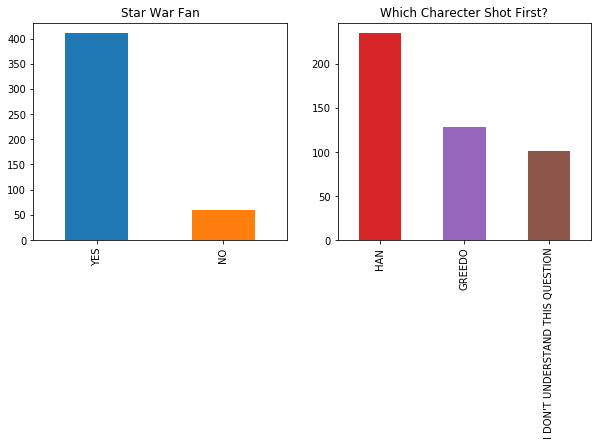

In [66]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);copy3.fan.value_counts().plot(kind='bar', color=['C0','C1']); plt.title('Star War Fan')
plt.subplot(1,2,2);copy3.firstShot.value_counts().plot(kind='bar', color=['C3','C4','C5']); plt.title('Which Charecter Shot First?')

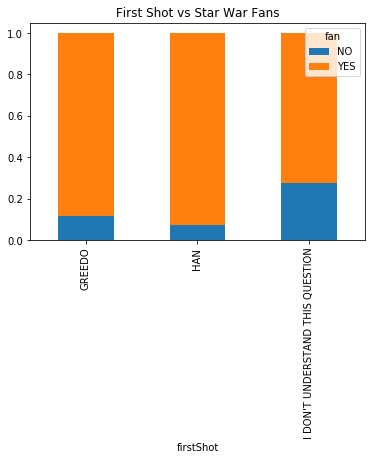

In [67]:
shot.unstack().plot(kind = 'bar', stacked = True, title = 'First Shot vs Star War Fans')
ax = plt.subplot(111)


<br>-From the above observation, we can see that Fans of StarWar have mostly chosen Han Solo as the right answer. After all Han     Solo is the right answer.</br>
<br>-However most of the fans have gotten confused with Greedo as after all Greedo was shot at. </br>
<br>-Finally, the most number of **non fans** have answered this question as 'I don't understand this question'</br>

### 3: Relationship between people’s demographics  and their attitude to Start War characters.

In [68]:
# Task 2: Data Exploration
# 3. Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

#Code goes after this line by adding cells

In [69]:
ques3.head() 

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,...,Familiarity|Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,...,VERY FAVORABLY,HAN,YES,NO,YES,MALE,18-29,"$25,000 - $49,999",BACHELOR DEGREE,MIDDLE ATLANTIC
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,...,SOMEWHAT FAVORABLY,HAN,YES,YES,YES,MALE,18-29,"$0 - $24,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST SOUTH CENTRAL
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,...,VERY FAVORABLY,GREEDO,YES,YES,YES,MALE,18-29,"$50,000 - $99,999",BACHELOR DEGREE,SOUTH ATLANTIC
27,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,...,VERY FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,SOUTH ATLANTIC


#### 3.1 Familiarity of Charecters vs Gender

Now to explore the people's demographics with familiarity, we need to go step by step with each demograph. 

Taking Gender for the first case.

In [70]:
gender = ques3[['Familiarity|Han Solo',                                            
'Familiarity|Luke Skywalker',                                          
'Familiarity|Princess Leia Organa',                                    
'Familiarity|Anakin Skywalker',                                        
'Familiarity|Obi Wan Kenobi',                                          
'Familiarity|Emperor Palpatine',                                       
'Familiarity|Darth Vader',                                             
'Familiarity|Lando Calrissian',                                        
'Familiarity|Boba Fett',                                               
'Familiarity|C-3P0',                                                   
'Familiarity|R2 D2',                                                   
'Familiarity|Jar Jar Binks',                                           
'Familiarity|Padme Amidala',                                           
'Familiarity|Yoda',
'Gender']]

In [71]:
gender.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda,Gender
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,MALE
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,MALE
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,MALE
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,MALE
27,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,MALE


In [72]:
gender.nunique()

Familiarity|Han Solo                5
Familiarity|Luke Skywalker          3
Familiarity|Princess Leia Organa    4
Familiarity|Anakin Skywalker        5
Familiarity|Obi Wan Kenobi          4
Familiarity|Emperor Palpatine       6
Familiarity|Darth Vader             5
Familiarity|Lando Calrissian        6
Familiarity|Boba Fett               6
Familiarity|C-3P0                   5
Familiarity|R2 D2                   4
Familiarity|Jar Jar Binks           6
Familiarity|Padme Amidala           6
Familiarity|Yoda                    4
Gender                              2
dtype: int64

In [73]:
gender.replace({'UNFAMILIAR (N/A)' : 0,
                'VERY FAVORABLY' : 1,
               'SOMEWHAT FAVORABLY' : 2,
               'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' : 3,
               'SOMEWHAT UNFAVORABLY' : 4,
               'VERY UNFAVORABLY' : 5,
               'MALE' : 0,
               'FEMALE' : 1}, inplace = True)

Making the data numeric so that we can plot multiple columns together. Using ```replace``` function we can change from categories to numeric labels

In [74]:
gender.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda,Gender
5,1,2,2,4,1,5,2,3,1,2,2,5,2,2,0
6,1,1,1,1,1,3,1,3,2,2,2,2,3,1,0
16,1,2,2,4,1,2,1,2,1,4,3,5,5,2,0
23,1,1,1,3,1,5,2,2,4,1,1,5,3,1,0
27,1,2,2,2,1,2,2,2,1,1,1,5,2,1,0


In [75]:
gender.isna().sum()

Familiarity|Han Solo                0
Familiarity|Luke Skywalker          0
Familiarity|Princess Leia Organa    0
Familiarity|Anakin Skywalker        0
Familiarity|Obi Wan Kenobi          0
Familiarity|Emperor Palpatine       0
Familiarity|Darth Vader             0
Familiarity|Lando Calrissian        0
Familiarity|Boba Fett               0
Familiarity|C-3P0                   0
Familiarity|R2 D2                   0
Familiarity|Jar Jar Binks           0
Familiarity|Padme Amidala           0
Familiarity|Yoda                    0
Gender                              0
dtype: int64

Rechecking if any of the columns have any missing value. Missing values were tackled in Part 1

In [76]:
gender['Familiarity|Emperor Palpatine'].value_counts()

1    35
2    34
3    24
5    21
4    11
0     7
Name: Familiarity|Emperor Palpatine, dtype: int64

In [77]:
gender.dtypes

Familiarity|Han Solo                int64
Familiarity|Luke Skywalker          int64
Familiarity|Princess Leia Organa    int64
Familiarity|Anakin Skywalker        int64
Familiarity|Obi Wan Kenobi          int64
Familiarity|Emperor Palpatine       int64
Familiarity|Darth Vader             int64
Familiarity|Lando Calrissian        int64
Familiarity|Boba Fett               int64
Familiarity|C-3P0                   int64
Familiarity|R2 D2                   int64
Familiarity|Jar Jar Binks           int64
Familiarity|Padme Amidala           int64
Familiarity|Yoda                    int64
Gender                              int64
dtype: object

In [78]:
gender.groupby('Gender').agg(lambda x:x.value_counts().index[0])

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda
Gender,,,,,,,,,,,,,,
0,1,1,1,2,1,1,1,2,1,1,1,5,1,1
1,1,1,1,1,1,3,1,2,1,1,1,5,3,1


As we can see from the above cell, the whole dataset is grouped by 'Gender' and the mode for each of the column is generated. This shows what people have voted most for each charecter. 

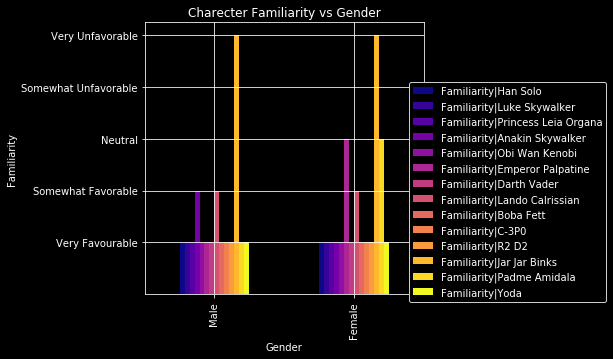

In [79]:
plt.style.use('dark_background')
gender.groupby('Gender').agg(lambda x:x.value_counts().index[0]).plot(kind = 'bar', 
                                                  figsize = (5,5),
                                                 title = 'Charecter Familiarity vs Gender',
                                                 grid = True,
                                                 legend = True,
                                                 colormap = 'plasma')
plt.ylabel('Familiarity')
plt.yticks((1,2,3,4,5),['Very Favourable','Somewhat Favorable','Neutral','Somewhat Unfavorable','Very Unfavorable'])
plt.xticks((0,1),['Male','Female'])
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)

The graph shows us that most of Male population voted 'Very Favourable' compared to female. Females also were close behind when it came to specific character. From the graph the most deviation from both male and female equally was between 'Jar Jar Binks' and 'Lando Calrrissan'

#### 3.2 Familiarity of Charecters vs Age 

Taking all the columns with the charecter and with Age. Subsetting this from ques3 dataFrame to make better and easier visualizations. 

In [80]:
age = ques3[['Familiarity|Han Solo',                                            
'Familiarity|Luke Skywalker',                                          
'Familiarity|Princess Leia Organa',                                    
'Familiarity|Anakin Skywalker',                                        
'Familiarity|Obi Wan Kenobi',                                          
'Familiarity|Emperor Palpatine',                                       
'Familiarity|Darth Vader',                                             
'Familiarity|Lando Calrissian',                                        
'Familiarity|Boba Fett',                                               
'Familiarity|C-3P0',                                                   
'Familiarity|R2 D2',                                                   
'Familiarity|Jar Jar Binks',                                           
'Familiarity|Padme Amidala',                                           
'Familiarity|Yoda',
'Age']]

In [81]:
age.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda,Age
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,18-29
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,18-29
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,18-29
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,18-29
27,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,18-29


In [82]:
age['Age'].value_counts()

18-29    43
30-44    40
45-60    28
> 60     21
Name: Age, dtype: int64

In [83]:
age.replace({'UNFAMILIAR (N/A)' : 0,
                'VERY FAVORABLY' : 1,
               'SOMEWHAT FAVORABLY' : 2,
               'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' : 3,
               'SOMEWHAT UNFAVORABLY' : 4,
               'VERY UNFAVORABLY' : 5,
               '18-29' : 0,
               '30-44' : 1,
            '45-60' : 2,
            '> 60' : 3}, inplace = True)

In [84]:
age.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda,Age
5,1,2,2,4,1,5,2,3,1,2,2,5,2,2,0
6,1,1,1,1,1,3,1,3,2,2,2,2,3,1,0
16,1,2,2,4,1,2,1,2,1,4,3,5,5,2,0
23,1,1,1,3,1,5,2,2,4,1,1,5,3,1,0
27,1,2,2,2,1,2,2,2,1,1,1,5,2,1,0


In [85]:
age.dtypes

Familiarity|Han Solo                int64
Familiarity|Luke Skywalker          int64
Familiarity|Princess Leia Organa    int64
Familiarity|Anakin Skywalker        int64
Familiarity|Obi Wan Kenobi          int64
Familiarity|Emperor Palpatine       int64
Familiarity|Darth Vader             int64
Familiarity|Lando Calrissian        int64
Familiarity|Boba Fett               int64
Familiarity|C-3P0                   int64
Familiarity|R2 D2                   int64
Familiarity|Jar Jar Binks           int64
Familiarity|Padme Amidala           int64
Familiarity|Yoda                    int64
Age                                 int64
dtype: object

In [86]:
age.groupby('Age').agg(lambda x:x.value_counts().index[0])

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda
Age,,,,,,,,,,,,,,
0,1,1,1,2,1,2,1,2,1,1,1,5,2,1
1,1,1,1,4,1,2,1,2,1,2,1,5,3,1
2,1,1,1,1,1,1,1,3,3,1,1,5,2,1
3,1,1,1,1,1,1,1,1,3,1,1,3,1,1


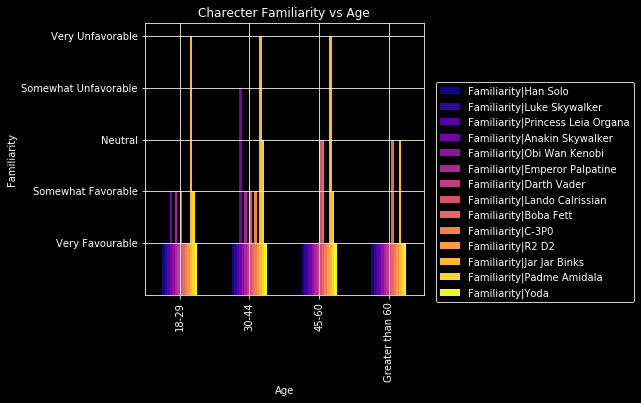

In [87]:
plt.style.use('dark_background')
age.groupby('Age').agg(lambda x:x.value_counts().index[0]).plot(kind = 'bar', 
                                                  figsize = (5,5),
                                                 title = 'Charecter Familiarity vs Age',
                                                 grid = True,
                                                 legend = True,
                                                 colormap = 'plasma')
plt.ylabel('Familiarity')
plt.yticks((1,2,3,4,5),['Very Favourable','Somewhat Favorable','Neutral','Somewhat Unfavorable','Very Unfavorable'])
plt.xticks((0,1,2,3),['18-29','30-44','45-60','Greater than 60'])
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1)

People with an age group of > 60 found Jar Jar Binks very favourable while others age groups rated the character very unfavourable. 

#### 3.3 Familiarity of Charecters vs Household Income 

In [88]:
income = ques3[['Familiarity|Han Solo',                                            
'Familiarity|Luke Skywalker',                                          
'Familiarity|Princess Leia Organa',                                    
'Familiarity|Anakin Skywalker',                                        
'Familiarity|Obi Wan Kenobi',                                          
'Familiarity|Emperor Palpatine',                                       
'Familiarity|Darth Vader',                                             
'Familiarity|Lando Calrissian',                                        
'Familiarity|Boba Fett',                                               
'Familiarity|C-3P0',                                                   
'Familiarity|R2 D2',                                                   
'Familiarity|Jar Jar Binks',                                           
'Familiarity|Padme Amidala',                                           
'Familiarity|Yoda',
'Household Income']]

In [89]:
income.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda,Household Income
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,"$100,000 - $149,999"
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,"$25,000 - $49,999"
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,"$0 - $24,999"
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,"$50,000 - $99,999"
27,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,"$100,000 - $149,999"


In [90]:
income['Household Income'].value_counts()

$50,000 - $99,999      50
$25,000 - $49,999      23
$0 - $24,999           21
$100,000 - $149,999    20
$150,000+              18
Name: Household Income, dtype: int64

In [91]:
income.replace({'UNFAMILIAR (N/A)' : 0,
                'VERY FAVORABLY' : 1,
               'SOMEWHAT FAVORABLY' : 2,
               'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' : 3,
               'SOMEWHAT UNFAVORABLY' : 4,
               'VERY UNFAVORABLY' : 5,
               '$0 - $24,999' : 0,
               '$25,000 - $49,999' : 1,
            '$50,000 - $99,999' : 2,
            '$100,000 - $149,999' : 3,
               '$150,000+' : 4}, inplace = True)

In [92]:
income.dtypes

Familiarity|Han Solo                int64
Familiarity|Luke Skywalker          int64
Familiarity|Princess Leia Organa    int64
Familiarity|Anakin Skywalker        int64
Familiarity|Obi Wan Kenobi          int64
Familiarity|Emperor Palpatine       int64
Familiarity|Darth Vader             int64
Familiarity|Lando Calrissian        int64
Familiarity|Boba Fett               int64
Familiarity|C-3P0                   int64
Familiarity|R2 D2                   int64
Familiarity|Jar Jar Binks           int64
Familiarity|Padme Amidala           int64
Familiarity|Yoda                    int64
Household Income                    int64
dtype: object

In [93]:
income.groupby('Household Income').agg(lambda x:x.value_counts().index[0])

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda
Household Income,,,,,,,,,,,,,,
0,1,1,1,1,1,2,1,2,1,1,1,5,1,1
1,1,1,1,2,1,1,1,2,1,2,1,5,4,1
2,1,1,1,1,1,3,1,2,3,1,1,5,2,1
3,1,1,1,1,1,1,1,1,1,1,1,5,1,1
4,1,1,1,2,1,3,1,3,2,1,1,5,3,1


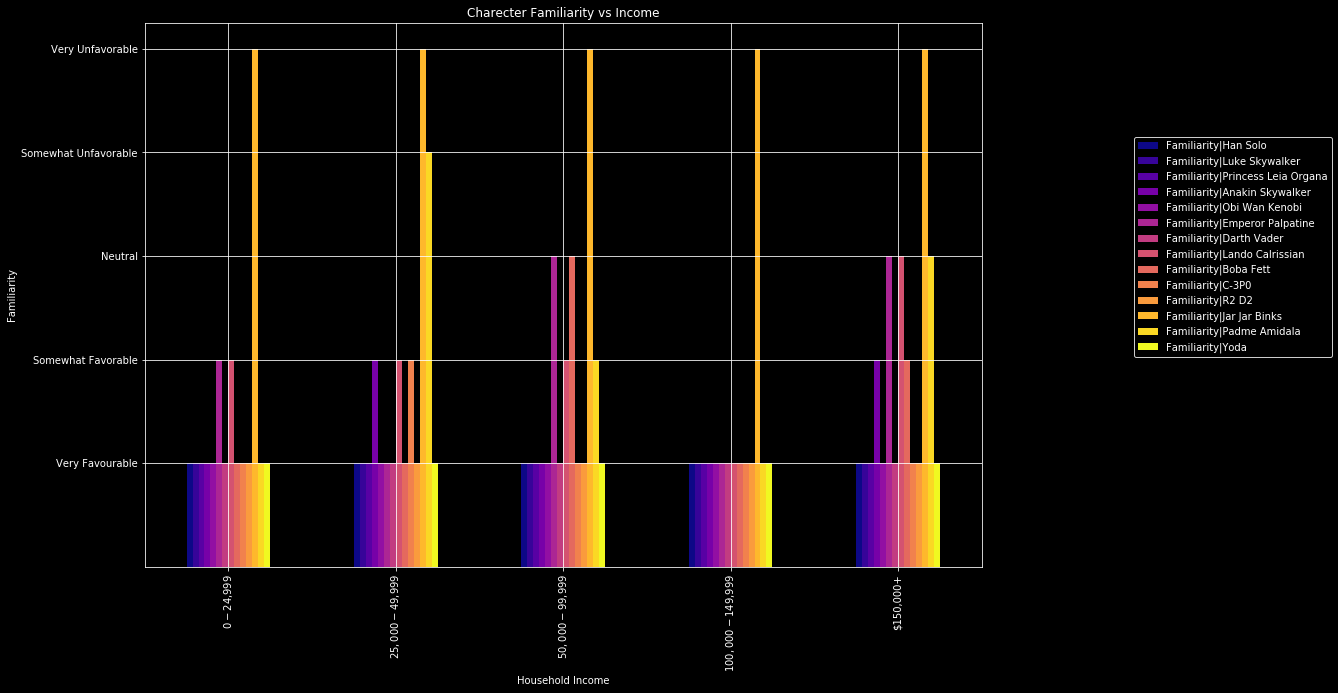

In [94]:
plt.style.use('dark_background')
income.groupby('Household Income').agg(lambda x:x.value_counts().index[0]).plot(kind = 'bar', 
                                                  figsize = (15,10),
                                                 title = 'Charecter Familiarity vs Income',
                                                 grid = True,
                                                 legend = True,
                                                 colormap = 'plasma')
plt.ylabel('Familiarity')
plt.yticks((1,2,3,4,5),['Very Favourable','Somewhat Favorable','Neutral','Somewhat Unfavorable','Very Unfavorable'])
plt.xticks((0,1,2,3,4),['$0 - $24,999','$25,000 - $49,999','$50,000 - $99,999','$100,000 - $149,999','$150,000+'])
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)

As we can see from the above graph, there is similarity for most charecters on how people have voted even when their income groups were different. People who had an income of more than USD 150,000 were a little more unsure of the charecters than the ones who had lesser income. 

We can also notice that the charecter familiarity was similar between USD 50K-99K income group and USD 150K income group. Income group ranging from $100K-150K were very sure of the charecters of the movies. 

#### 3.4 Familiarity of Charecters vs Education Level

In [95]:
education = ques3[['Familiarity|Han Solo',                                            
'Familiarity|Luke Skywalker',                                          
'Familiarity|Princess Leia Organa',                                    
'Familiarity|Anakin Skywalker',                                        
'Familiarity|Obi Wan Kenobi',                                          
'Familiarity|Emperor Palpatine',                                       
'Familiarity|Darth Vader',                                             
'Familiarity|Lando Calrissian',                                        
'Familiarity|Boba Fett',                                               
'Familiarity|C-3P0',                                                   
'Familiarity|R2 D2',                                                   
'Familiarity|Jar Jar Binks',                                           
'Familiarity|Padme Amidala',                                           
'Familiarity|Yoda',
'Education']]

In [96]:
education.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda,Education
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOME COLLEGE OR ASSOCIATE DEGREE
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,BACHELOR DEGREE
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOME COLLEGE OR ASSOCIATE DEGREE
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,BACHELOR DEGREE
27,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOME COLLEGE OR ASSOCIATE DEGREE


In [97]:
education['Education'].value_counts()

SOME COLLEGE OR ASSOCIATE DEGREE    49
BACHELOR DEGREE                     38
GRADUATE DEGREE                     33
HIGH SCHOOL DEGREE                  11
LESS THAN HIGH SCHOOL DEGREE         1
Name: Education, dtype: int64

In [98]:
education.replace({'UNFAMILIAR (N/A)' : 0,
                'VERY FAVORABLY' : 1,
               'SOMEWHAT FAVORABLY' : 2,
               'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' : 3,
               'SOMEWHAT UNFAVORABLY' : 4,
               'VERY UNFAVORABLY' : 5,
               'LESS THAN HIGH SCHOOL DEGREE' : 0,
               'HIGH SCHOOL DEGREE' : 1,
            'SOME COLLEGE OR ASSOCIATE DEGREE' : 2,
            'BACHELOR DEGREE' : 3,
               'GRADUATE DEGREE' : 4}, inplace = True)

In [99]:
education.dtypes

Familiarity|Han Solo                int64
Familiarity|Luke Skywalker          int64
Familiarity|Princess Leia Organa    int64
Familiarity|Anakin Skywalker        int64
Familiarity|Obi Wan Kenobi          int64
Familiarity|Emperor Palpatine       int64
Familiarity|Darth Vader             int64
Familiarity|Lando Calrissian        int64
Familiarity|Boba Fett               int64
Familiarity|C-3P0                   int64
Familiarity|R2 D2                   int64
Familiarity|Jar Jar Binks           int64
Familiarity|Padme Amidala           int64
Familiarity|Yoda                    int64
Education                           int64
dtype: object

In [100]:
education.groupby('Education').agg(lambda x:x.value_counts().index[0])

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda
Education,,,,,,,,,,,,,,
0,1,1,1,2,1,1,1,1,3,2,2,4,1,1
1,1,1,1,2,1,2,1,2,1,1,1,2,2,1
2,1,1,1,2,1,1,1,3,1,1,1,5,2,1
3,1,1,1,4,1,2,1,2,1,1,1,5,3,1
4,1,1,1,1,1,3,1,3,1,1,1,5,3,1


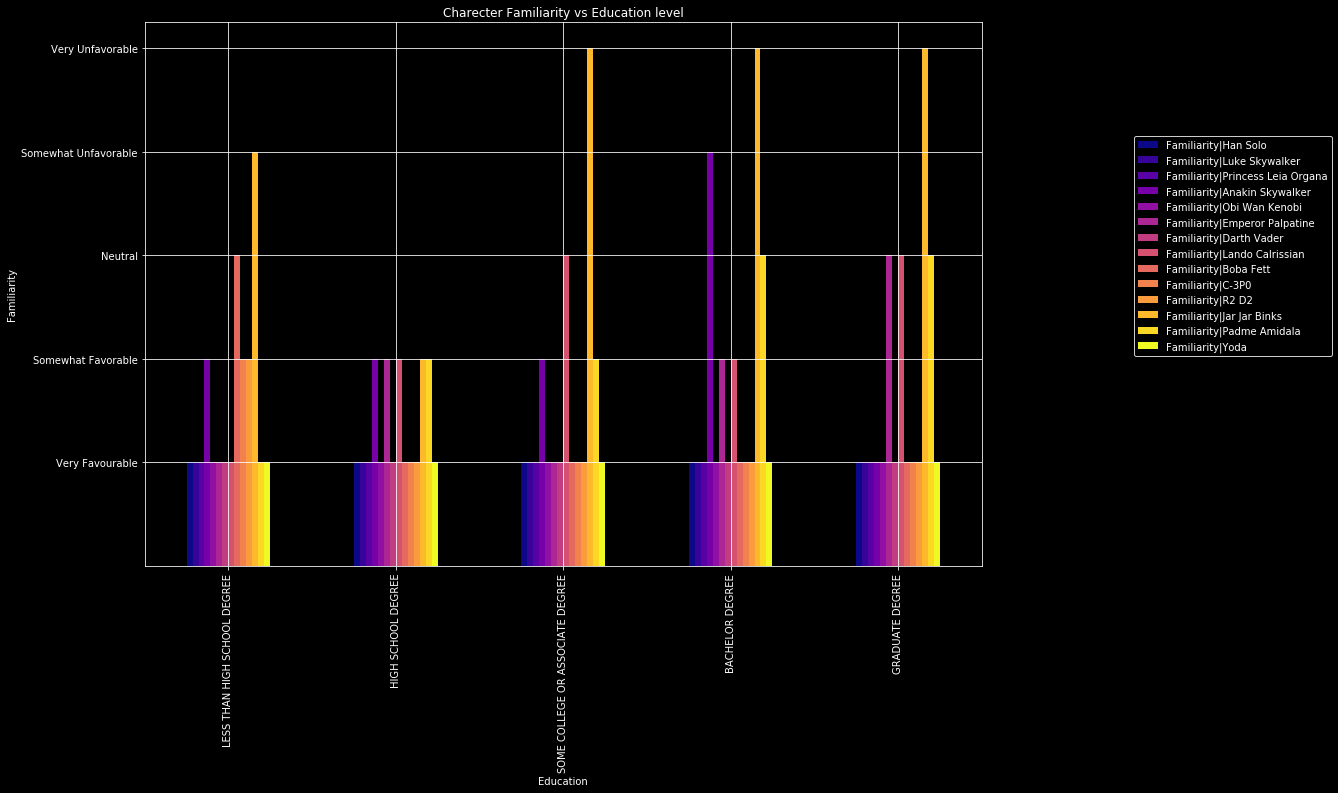

In [101]:
plt.style.use('dark_background')
education.groupby('Education').agg(lambda x:x.value_counts().index[0]).plot(kind = 'bar', 
                                                  figsize = (15,10),
                                                 title = 'Charecter Familiarity vs Education level',
                                                 grid = True,
                                                 legend = True,
                                                 colormap = 'plasma')
plt.ylabel('Familiarity')
plt.yticks((1,2,3,4,5),['Very Favourable','Somewhat Favorable','Neutral','Somewhat Unfavorable','Very Unfavorable'])
plt.xticks((0,1,2,3,4),['LESS THAN HIGH SCHOOL DEGREE','HIGH SCHOOL DEGREE','SOME COLLEGE OR ASSOCIATE DEGREE','BACHELOR DEGREE','GRADUATE DEGREE'])
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)

From the above graph we can see that people with less than high school degree are very favourible to most of the charecters compared to all other education level. While other education levels chose very favourable for 'R2D2','C-3PD', 'Boba Fett'. Most people having High School degree chose either very favourable or somewhat favourable which indicates a more understanding of the charecters. 

#### 3.4 Familiarity of Charecters vs Location 

In [102]:
location = ques3[['Familiarity|Han Solo',                                            
'Familiarity|Luke Skywalker',                                          
'Familiarity|Princess Leia Organa',                                    
'Familiarity|Anakin Skywalker',                                        
'Familiarity|Obi Wan Kenobi',                                          
'Familiarity|Emperor Palpatine',                                       
'Familiarity|Darth Vader',                                             
'Familiarity|Lando Calrissian',                                        
'Familiarity|Boba Fett',                                               
'Familiarity|C-3P0',                                                   
'Familiarity|R2 D2',                                                   
'Familiarity|Jar Jar Binks',                                           
'Familiarity|Padme Amidala',                                           
'Familiarity|Yoda',
'Location (Census Region)']]

In [103]:
location.head()

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda,Location (Census Region)
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,WEST NORTH CENTRAL
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,MIDDLE ATLANTIC
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,WEST SOUTH CENTRAL
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOUTH ATLANTIC
27,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOUTH ATLANTIC


In [104]:
location['Location (Census Region)'].value_counts()

SOUTH ATLANTIC        26
PACIFIC               21
WEST SOUTH CENTRAL    16
EAST NORTH CENTRAL    16
MIDDLE ATLANTIC       15
NEW ENGLAND           14
WEST NORTH CENTRAL     9
MOUNTAIN               8
EAST SOUTH CENTRAL     7
Name: Location (Census Region), dtype: int64

In [105]:
location.replace({'UNFAMILIAR (N/A)' : 0,
                'VERY FAVORABLY' : 1,
               'SOMEWHAT FAVORABLY' : 2,
               'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' : 3,
               'SOMEWHAT UNFAVORABLY' : 4,
               'VERY UNFAVORABLY' : 5,
               'SOUTH ATLANTIC' : 0,
               'PACIFIC' : 1,
            'EAST NORTH CENTRAL' : 2,
            'WEST SOUTH CENTRAL' : 3,
               'MIDDLE ATLANTIC' : 4,
                 'NEW ENGLAND' : 5,
                 'WEST NORTH CENTRAL' : 6,
                 'MOUNTAIN' : 7,
                 'EAST SOUTH CENTRAL' : 8}, inplace = True)

In [106]:
location.dtypes

Familiarity|Han Solo                int64
Familiarity|Luke Skywalker          int64
Familiarity|Princess Leia Organa    int64
Familiarity|Anakin Skywalker        int64
Familiarity|Obi Wan Kenobi          int64
Familiarity|Emperor Palpatine       int64
Familiarity|Darth Vader             int64
Familiarity|Lando Calrissian        int64
Familiarity|Boba Fett               int64
Familiarity|C-3P0                   int64
Familiarity|R2 D2                   int64
Familiarity|Jar Jar Binks           int64
Familiarity|Padme Amidala           int64
Familiarity|Yoda                    int64
Location (Census Region)            int64
dtype: object

In [107]:
location.groupby('Location (Census Region)').agg(lambda x:x.value_counts().index[0])

,Familiarity|Han Solo,Familiarity|Luke Skywalker,Familiarity|Princess Leia Organa,Familiarity|Anakin Skywalker,Familiarity|Obi Wan Kenobi,Familiarity|Emperor Palpatine,Familiarity|Darth Vader,Familiarity|Lando Calrissian,Familiarity|Boba Fett,Familiarity|C-3P0,Familiarity|R2 D2,Familiarity|Jar Jar Binks,Familiarity|Padme Amidala,Familiarity|Yoda
Location (Census Region),,,,,,,,,,,,,,
0,1,1,1,2,1,5,2,2,1,1,1,5,3,1
1,1,1,1,1,1,3,1,2,1,1,1,5,2,1
2,1,1,1,1,1,4,1,2,1,1,1,5,2,1
3,1,1,1,4,1,2,1,3,3,1,1,5,3,1
4,1,1,1,4,1,3,1,3,1,2,1,5,2,1
5,1,1,1,2,1,2,1,1,1,1,1,3,1,1
6,1,1,1,1,1,5,1,2,1,1,1,5,1,1
7,1,1,1,2,1,1,1,4,5,1,1,3,3,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1


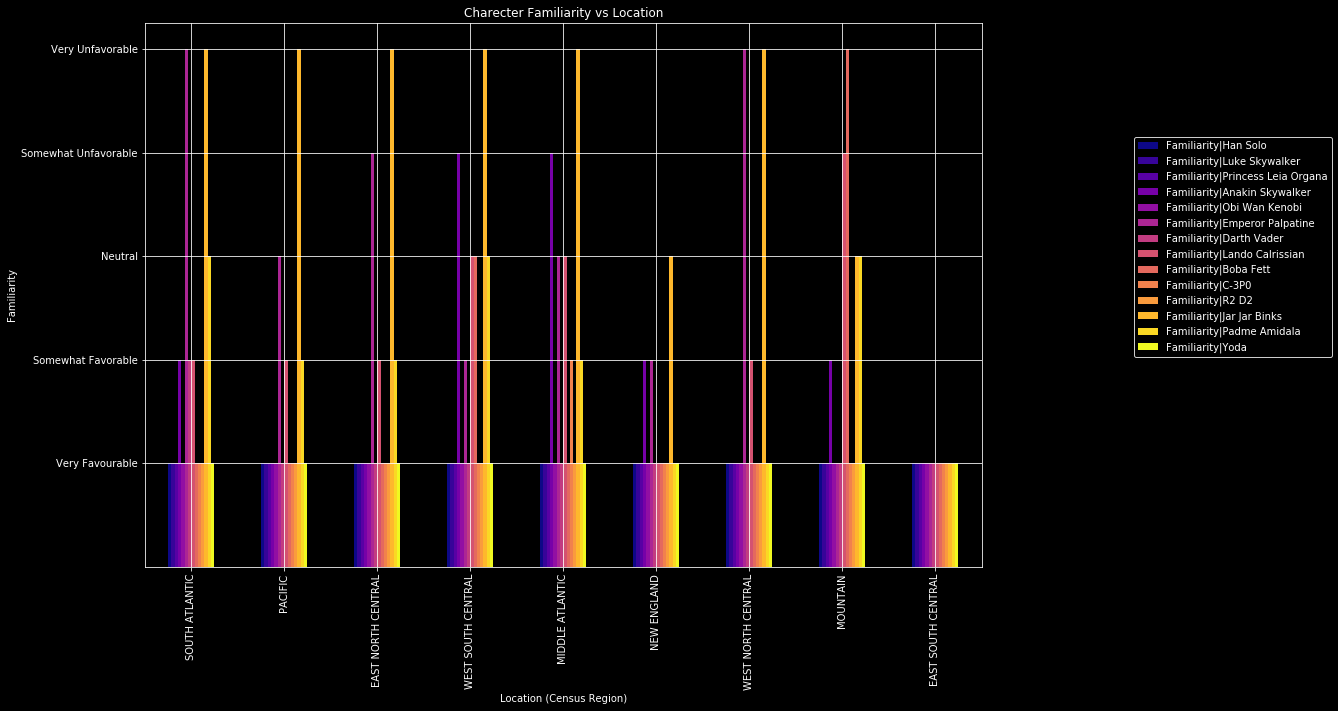

In [108]:
plt.style.use('dark_background')
location.groupby('Location (Census Region)').agg(lambda x:x.value_counts().index[0]).plot(kind = 'bar', 
                                                  figsize = (15,10),
                                                 title = 'Charecter Familiarity vs Location',
                                                 grid = True,
                                                 legend = True,
                                                 colormap = 'plasma')
plt.ylabel('Familiarity')
plt.yticks((1,2,3,4,5),['Very Favourable','Somewhat Favorable','Neutral','Somewhat Unfavorable','Very Unfavorable'])
plt.xticks((0,1,2,3,4,5,6,7,8),['SOUTH ATLANTIC','PACIFIC','EAST NORTH CENTRAL','WEST SOUTH CENTRAL','MIDDLE ATLANTIC','NEW ENGLAND','WEST NORTH CENTRAL','MOUNTAIN','EAST SOUTH CENTRAL'])
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)

People from South Atlantic and West North Central, consider Emperor Palpatine Very Unfavourable while others regions either consider him Neutral to Very Favourable. Jar Jar Binks is considered Very Unfavourable by all regions except New England and East South Central. Most other charecters to a large extent are considered Very Favourable. 